In [1]:
import numpy as np
import pandas as pd

import json

import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
import torch.utils.data
from torch.nn import CrossEntropyLoss

from utils.torchutils import get_device

pio.templates.default = "simple_white"
# pio.renderers.default = "plotly_mimetype"
pio.renderers.default = "png"

from experiments.datasets.imbalancing import split_with_label_distribution_skew, train_test_split
from experiments.datasets.cifar import CIFAR10
from experiments.datasets.mnist import MNIST

from models.mnist import CNN
from experiments.datasets.base import create_dataloader

from torch.optim import SGD

In [2]:
BASEDIR = "../output"

N_CLIENTS = 50
GAMMA = 0.8
BATCH_SIZE = 64
LR = 2e-3
EPOCHS = 5
ROUNDS = 30
ALPHA = 1
MU = 0
MODEL = CNN

In [3]:
dataset = MNIST("/tmp/data").train_data()

client_datasets = split_with_label_distribution_skew(dataset, ALPHA, N_CLIENTS)
client_train_datasets, client_test_datasets = train_test_split(client_datasets)

client_train_dataloaders = [create_dataloader(ds, BATCH_SIZE) for ds in client_train_datasets]
client_test_dataloaders = [create_dataloader(ds, BATCH_SIZE) for ds in client_test_datasets]

In [4]:
def create_optimizer(params):
    return SGD(params, LR)

In [5]:
from federated_learning.fedprox_new import FedProx

fedprox = FedProx(
    model_class=MODEL,
    loss=CrossEntropyLoss(),
    optimizer=create_optimizer,
    rounds=ROUNDS,
    epochs=EPOCHS,
    gamma=GAMMA,
    mu=MU,
    device=get_device()
)

results = fedprox.fit(client_train_dataloaders, client_test_dataloaders)

Using device 'cuda'
40


Round:   0%|          | 0/30 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

/home/lukas/Work/masterthesis-clustered-fl/.venv/lib/python3.11/site-packages/torch/overrides.py:110: UserWarning:

'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'

/home/lukas/Work/masterthesis-clustered-fl/.venv/lib/python3.11/site-packages/torch/overrides.py:111: UserWarning:

'has_cudnn' is deprecated, please use 'torch.backends.cudnn.is_available()'

/home/lukas/Work/masterthesis-clustered-fl/.venv/lib/python3.11/site-packages/torch/overrides.py:117: UserWarning:

'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'

/home/lukas/Work/masterthesis-clustered-fl/.venv/lib/python3.11/site-packages/torch/overrides.py:118: UserWarning:

'has_mkldnn' is deprecated, please use 'torch.backends.mkldnn.is_available()'



Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

Client:   0%|          | 0/50 [00:00<?, ?it/s]

In [6]:
df = results.as_dataframe()

In [7]:
df

,round,client0_train_loss,client0_test_loss,client0_test_accuracy,client1_train_loss,client1_test_loss,client1_test_accuracy,client2_train_loss,client2_test_loss,client2_test_accuracy,...,client47_test_accuracy,client48_train_loss,client48_test_loss,client48_test_accuracy,client49_train_loss,client49_test_loss,client49_test_accuracy,average_train_loss,average_test_loss,average_test_accuracy
0,1,2.154476,2.054477,0.333333,2.185396,2.046200,0.404762,NaN,NaN,NaN,...,0.928571,0.554747,0.514740,0.898810,0.312319,0.277687,0.958333,1.212113,1.062622,0.716140
1,2,0.297012,0.293884,0.923372,NaN,NaN,NaN,0.332033,0.306361,0.929134,...,0.953782,0.391588,0.417045,0.907738,0.253143,0.234057,0.968750,0.362212,0.318741,0.929488
2,3,0.278620,0.303307,0.923372,0.328774,0.327892,0.897959,NaN,NaN,NaN,...,0.949580,NaN,NaN,NaN,0.223383,0.212992,0.961806,0.365140,0.300003,0.925921
3,4,0.264454,0.328216,0.923372,0.327583,0.321916,0.908163,0.329983,0.290779,0.933071,...,0.962185,NaN,NaN,NaN,0.211403,0.200612,0.961806,0.356376,0.294541,0.931385
4,5,0.260475,0.222132,0.934866,0.322105,0.319150,0.904762,0.323986,0.283939,0.933071,...,0.957983,0.328107,0.331771,0.922619,NaN,NaN,NaN,0.348228,0.276485,0.930635
5,6,NaN,NaN,NaN,NaN,NaN,NaN,0.281180,0.272157,0.937008,...,NaN,0.287203,0.313961,0.928571,NaN,NaN,NaN,0.307098,0.269051,0.933388
6,7,NaN,NaN,NaN,0.286918,0.294010,0.914966,0.272975,0.265951,0.944882,...,0.962185,0.250171,0.281263,0.928571,NaN,NaN,NaN,0.300428,0.256706,0.934551
7,8,0.222458,0.217537,0.942529,0.280999,0.292478,0.914966,0.266495,0.256016,0.948819,...,NaN,0.225340,0.278067,0.931548,0.171427,0.155542,0.968750,0.297149,0.247301,0.938482
8,9,0.213642,0.225220,0.942529,0.276335,0.282866,0.914966,NaN,NaN,NaN,...,NaN,0.226951,0.275248,0.937500,0.142954,0.141633,0.979167,0.275713,0.238955,0.940795
9,10,NaN,NaN,NaN,0.270825,0.294009,0.914966,0.258463,0.246108,0.944882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.299714,0.253959,0.935537


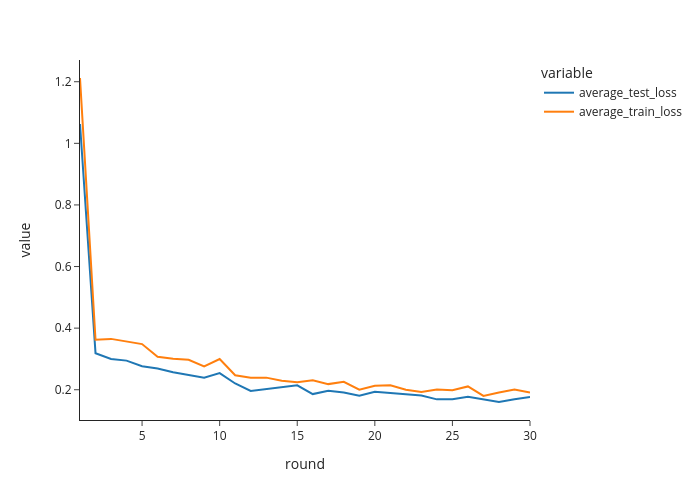

In [8]:
px.line(df, x="round", y=["average_test_loss", "average_train_loss"])

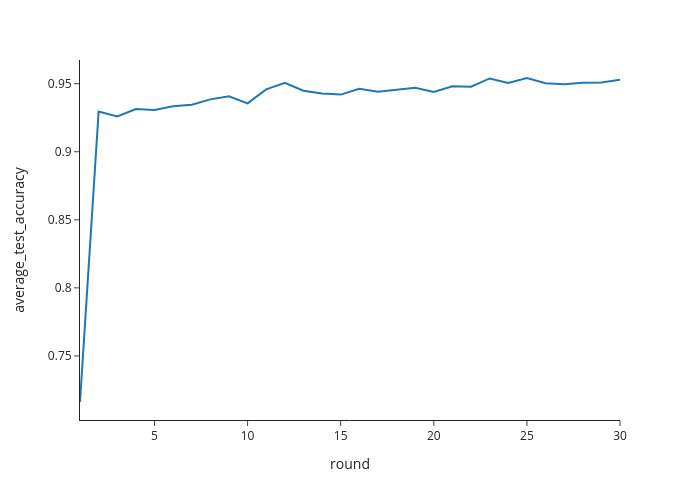

In [9]:
px.line(df, x="round", y="average_test_accuracy")